# The EDA case study analysis is mainly divided into parts:
## Data Understanding,
## Data Cleaning,
## Data Analysis,
## Recommendations

In [3]:
import numpy as np
print('numpy version\t:',np.__version__)
import pandas as pd
print('pandas version\t:',pd.__version__)
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

# Regular expressions
import re

# seaborn : advanced visualization
import seaborn as sns
print('seaborn version\t:',sns.__version__)

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 100) # to display all the columns

np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

import os

import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

numpy version	: 1.15.4
pandas version	: 0.23.4
seaborn version	: 0.9.0


In [6]:
application=pd.read_csv('application_data.csv')

In [7]:
application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0               Y             0       202500.0000  406597.5000   24700.5000   
1               N             0       270000.0000 1293502.5000   35698.5000   
2               Y             0        67500.0000  135000.0000    6750.0000   
3               Y             0       135000.0000  312682.5000   29686.5000   
4               Y             0       121500.0000  513000.0000   21865.5000   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      351000.0000   Unaccompanied          Working   
1     1129500.0000          Family    State servant   
2      135000.0000   Unaccompanied          Working   
3      297000.0000   Unaccompanied          Working   
4      513000.0000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                      0.0188       -9461           -637         -3648.0000   
1                      0.0035      -16765          -1188         -1186.0000   
2                      0.0100      -19046           -225         -4260.0000   
3                      0.0080      -19005          -3039         -9833.0000   
4                      0.0287      -19932          -3038         -4311.0000   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          nan           1               1                0   
1             -291          nan           1               1                0   
2            -2531      26.0000           1               1                1   
3            -2437          nan           1               1                0   
4            -3458          nan           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers           1.0000   
1                 1           1           0      Core staff           2.0000   
2                 1           1           0        Laborers           1.0000   
3                 1           0           0        Laborers           2.0000   
4                 1           0           0      Core staff           1.0000   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                  

In [8]:
application.shape

(307511, 122)

In [9]:
#Looking at all the Column names
application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## List of Columns & NA counts where NA values are more than 30%

In [10]:
application.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [11]:
#getting the percentage of missing values
round((application.isna().sum()*100)/application.shape[0], 2)*100


SK_ID_CURR                      0.0000
TARGET                          0.0000
NAME_CONTRACT_TYPE              0.0000
CODE_GENDER                     0.0000
FLAG_OWN_CAR                    0.0000
FLAG_OWN_REALTY                 0.0000
CNT_CHILDREN                    0.0000
AMT_INCOME_TOTAL                0.0000
AMT_CREDIT                      0.0000
AMT_ANNUITY                     0.0000
AMT_GOODS_PRICE                 9.0000
NAME_TYPE_SUITE                42.0000
NAME_INCOME_TYPE                0.0000
NAME_EDUCATION_TYPE             0.0000
NAME_FAMILY_STATUS              0.0000
NAME_HOUSING_TYPE               0.0000
REGION_POPULATION_RELATIVE      0.0000
DAYS_BIRTH                      0.0000
DAYS_EMPLOYED                   0.0000
DAYS_REGISTRATION               0.0000
DAYS_ID_PUBLISH                 0.0000
OWN_CAR_AGE                  6599.0000
FLAG_MOBIL                      0.0000
FLAG_EMP_PHONE                  0.0000
FLAG_WORK_PHONE                 0.0000
FLAG_CONT_MOBILE         

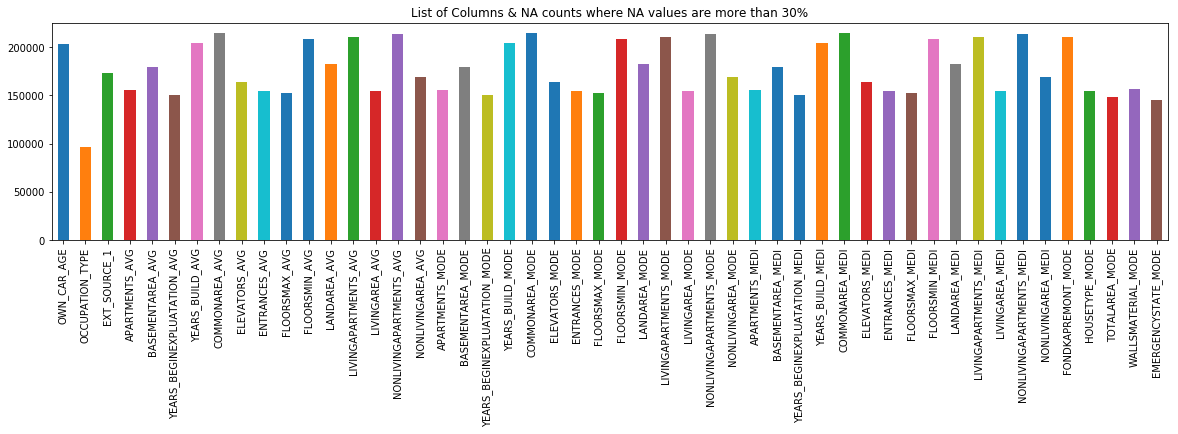

In [12]:
NA_col = application.isnull().sum()
NA_col = NA_col[NA_col.values >(0.3*len(application))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 30%')
plt.show()

### Insights: So we can see from the above plot that there are 20+ columns in the dataset where all the values are NA.

As we can see there are 307511 rows & 122 columns in the dataset, it will be very difficult to look at each column one by one & find the NA or missing values. So let's find out all columns where missing values are more than certain percentage, let's say 30%. We will remove those columns as it is not feasable to impute missing values for those columns.

We will create a UDF for this

In [13]:
def removeNulls(dataframe, axis =1, percent=0.3):
    '''
    * removeNull function will remove the rows and columns based on parameters provided.
    * dataframe : Name of the dataframe  
    * axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    * percent   : percent of data where column/rows values are null,default is 0.3(30%)
              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

## 1. Remove columns where NA values are more than or equal to 30%¶

In [14]:
application = removeNulls(application, axis =1,percent = 0.3)

Number of Columns dropped	:  50

Old dataset rows,columns (307511, 122) 
New dataset rows,columns (307511, 72)


# 2. Remove rows where NA values are more than or equal to 30%

## (Note: NA columns has already been removed in step 1, so we may not find any rows where 30% values are NA)


In [15]:
application = removeNulls(application, axis =0,percent = 0.3)


Number of Rows dropped	:  0

Old dataset rows,columns (307511, 72) 
New dataset rows,columns (307511, 72)


# 3. Remove columns where number of unique value is only 1.

## Let's look at no of unique values for each column.We will remove all columns where number of unique value is only 1 because that will not make any sense in the analysis


In [16]:
unique = application.nunique()
unique = unique[unique.values == 1]

In [17]:
application.drop(labels = list(unique.index), axis =1, inplace=True)
print("So now we are left with",application.shape ,"rows & columns.")

So now we are left with (307511, 72) rows & columns.


In [18]:
application.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0               Y             0       202500.0000  406597.5000   24700.5000   
1               N             0       270000.0000 1293502.5000   35698.5000   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      351000.0000   Unaccompanied          Working   
1     1129500.0000          Family    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                      0.0188       -9461           -637         -3648.0000   
1                      0.0035      -16765          -1188         -1186.0000   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0           1.0000   
1                 1           1           0           2.0000   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0        0.2629        0.1394                    2.0000   
1        0.6222           nan                    1.0000   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                    2.0000                    2.0000   
1                    0.0000                    1.0000   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
0                    2.0000              -1134.0000                0   
1                    0.0000               -828.0000                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0                0                0   
1                1                0                0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
0                0                0                0                 0   
1                0                0                0                 0   

   FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0                 0                 0                 0   

In [19]:
not_required_columns = ["REGION_POPULATION_RELATIVE","DAYS_REGISTRATION","DAYS_ID_PUBLISH","FLAG_EMP_PHONE","FLAG_WORK_PHONE","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21","DAYS_LAST_PHONE_CHANGE","EXT_SOURCE_2","EXT_SOURCE_3"]
application=application.drop(labels = not_required_columns, axis =1, inplace=False)
print("So now we are left with",application.shape ,"rows & columns.")

So now we are left with (307511, 36) rows & columns.


In [20]:
#Again Printing the Data set
application.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0               Y             0       202500.0000  406597.5000   24700.5000   
1               N             0       270000.0000 1293502.5000   35698.5000   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      351000.0000   Unaccompanied          Working   
1     1129500.0000          Family    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_CONT_MOBILE  FLAG_PHONE  \
0       -9461           -637           1                 1           1   
1      -16765          -1188           1                 1           1   

   FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0           1.0000                     2   
1           0           2.0000                     1   

   REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                            2  Business Entity Type 3   
1                            1                  School   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                    2.0000                    2.0000   
1                    1.0000                    0.0000   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                    2.0000                    2.0000   
1                    1.0000                    0.0000   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                      0.0000                     0.0000   
1                      0.0000                     0.0000   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                      0.0000                     0.0000   
1                      0.0000                     0.0000   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                     0.0000                      1.0000  
1                     0.0000                      0.0000

In [21]:
#Again checking for the null values
application.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
FLAG_MOBIL                         0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
ORGANIZATION_TYPE                  0
OBS_30_CNT_SOCIAL_CIRCLE        1021
D

In [22]:
#Getting the Percentages
(application.isna().sum()*100)/application.shape[0]  

SK_ID_CURR                     0.0000
TARGET                         0.0000
NAME_CONTRACT_TYPE             0.0000
CODE_GENDER                    0.0000
FLAG_OWN_CAR                   0.0000
FLAG_OWN_REALTY                0.0000
CNT_CHILDREN                   0.0000
AMT_INCOME_TOTAL               0.0000
AMT_CREDIT                     0.0000
AMT_ANNUITY                    0.0039
AMT_GOODS_PRICE                0.0904
NAME_TYPE_SUITE                0.4201
NAME_INCOME_TYPE               0.0000
NAME_EDUCATION_TYPE            0.0000
NAME_FAMILY_STATUS             0.0000
NAME_HOUSING_TYPE              0.0000
DAYS_BIRTH                     0.0000
DAYS_EMPLOYED                  0.0000
FLAG_MOBIL                     0.0000
FLAG_CONT_MOBILE               0.0000
FLAG_PHONE                     0.0000
FLAG_EMAIL                     0.0000
CNT_FAM_MEMBERS                0.0007
REGION_RATING_CLIENT           0.0000
REGION_RATING_CLIENT_W_CITY    0.0000
ORGANIZATION_TYPE              0.0000
OBS_30_CNT_S

# The Data is ready for analysis as there are very fews columns missing or null values and they won't be taking part in the analysis.

In [23]:
application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 36 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
DAYS_BIRTH              

In [24]:
#Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
#So it means that only the applicants whose Target value is 1 may default in future.
application['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [25]:
#default rate
round(np.mean(application['TARGET']),2)

0.08

# The overall default rate is about 8%.

# Let's first visualise the average default rates across categorical variables.


In [26]:
cat_df=application.select_dtypes(include='object')
(cat_df.isna().sum()*100)/cat_df.shape[0]

NAME_CONTRACT_TYPE    0.0000
CODE_GENDER           0.0000
FLAG_OWN_CAR          0.0000
FLAG_OWN_REALTY       0.0000
NAME_TYPE_SUITE       0.4201
NAME_INCOME_TYPE      0.0000
NAME_EDUCATION_TYPE   0.0000
NAME_FAMILY_STATUS    0.0000
NAME_HOUSING_TYPE     0.0000
ORGANIZATION_TYPE     0.0000
dtype: float64

In [27]:
cat_df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [28]:
# lets define a function to plot loan_status across categorical variables
def plot_cat(cat_var, dt):
    sns.countplot(x=cat_var, hue=application['TARGET'], data=dt)
    plt.show()

In [29]:
col=list(cat_df.columns)
r=len(col)
for i in range(0,10):
    print(cat_df[col[i]].value_counts())
    print('\n')

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Nam

In [30]:
def convxna(x):
    if(x=='XNA' or x=='XAP'):
        x=np.NAN
    return x

In [31]:
cat_dff=cat_df.applymap(convxna)

In [32]:
(cat_dff.isna().sum()*100)/cat_dff.shape[0]

NAME_CONTRACT_TYPE     0.0000
CODE_GENDER            0.0013
FLAG_OWN_CAR           0.0000
FLAG_OWN_REALTY        0.0000
NAME_TYPE_SUITE        0.4201
NAME_INCOME_TYPE       0.0000
NAME_EDUCATION_TYPE    0.0000
NAME_FAMILY_STATUS     0.0000
NAME_HOUSING_TYPE      0.0000
ORGANIZATION_TYPE     18.0072
dtype: float64

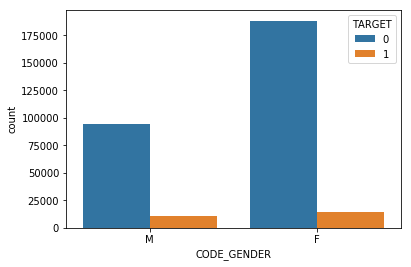

In [33]:
plot_cat('CODE_GENDER',cat_dff)

## This means MALE applicants have equal chances of defaulting the LOAN.

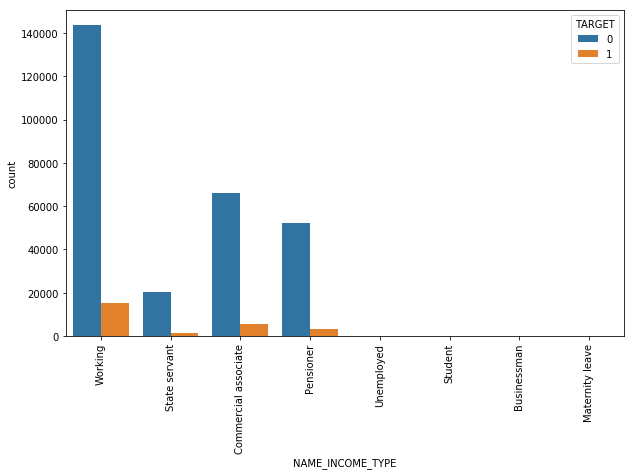

In [41]:
plt.figure(figsize=(10,6))
plt.xticks(rotation='vertical')
plot_cat('NAME_INCOME_TYPE',cat_dff)

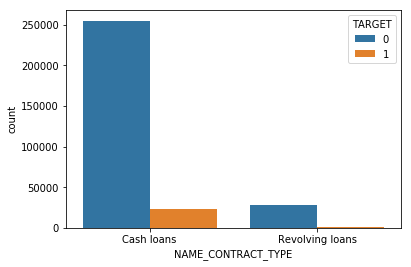

In [72]:
plot_cat('NAME_CONTRACT_TYPE',cat_dff)

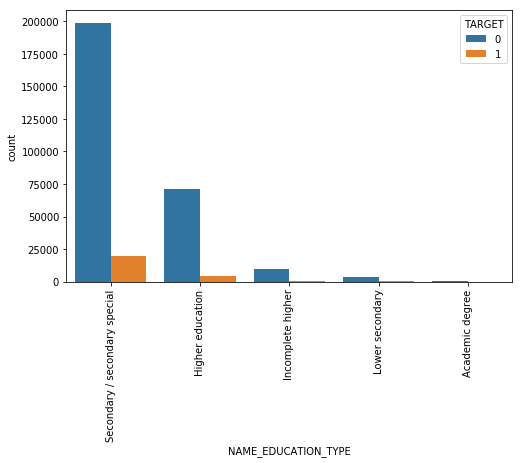

In [76]:
plt.figure(figsize=(8,5))
plt.xticks(rotation='vertical')
plot_cat('NAME_EDUCATION_TYPE',cat_dff)

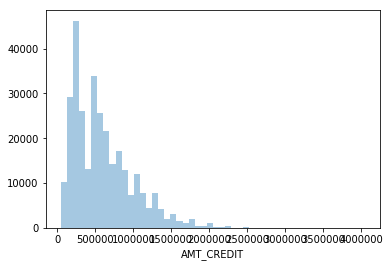

In [31]:
sns.distplot(application['AMT_CREDIT'],kde=False)
plt.show()

# Let's bin the Credit amount variable into small, medium, high, very high.

In [32]:
def credit_amount(n):
    if n < 100000:
        return 'low'
    elif n >=100000 and n < 200000:
        return 'medium'
    elif n >= 200000 and n < 400000:
        return 'high'
    else:
        return 'very high'
        
application['AMT_CREDIT_LIMIT'] = application['AMT_CREDIT'].apply(lambda x: credit_amount(x))

In [79]:
application['AMT_CREDIT_LIMIT'].value_counts()

very high    190216
high          81151
medium        30140
low            6004
Name: AMT_CREDIT_LIMIT, dtype: int64

In [80]:
def annual_rate(n):
    if n <= 7500:
        return 'low'
    elif n > 7500 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
    
application['AMT_ANNUITY_LIMIT'] = application['AMT_ANNUITY'].apply(lambda x: annual_rate(x))

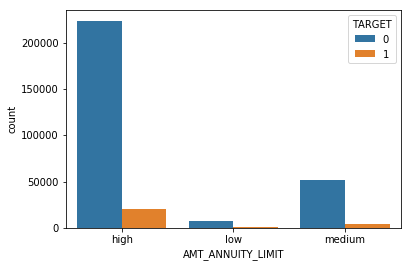

In [82]:
plot_cat('AMT_ANNUITY_LIMIT',application)

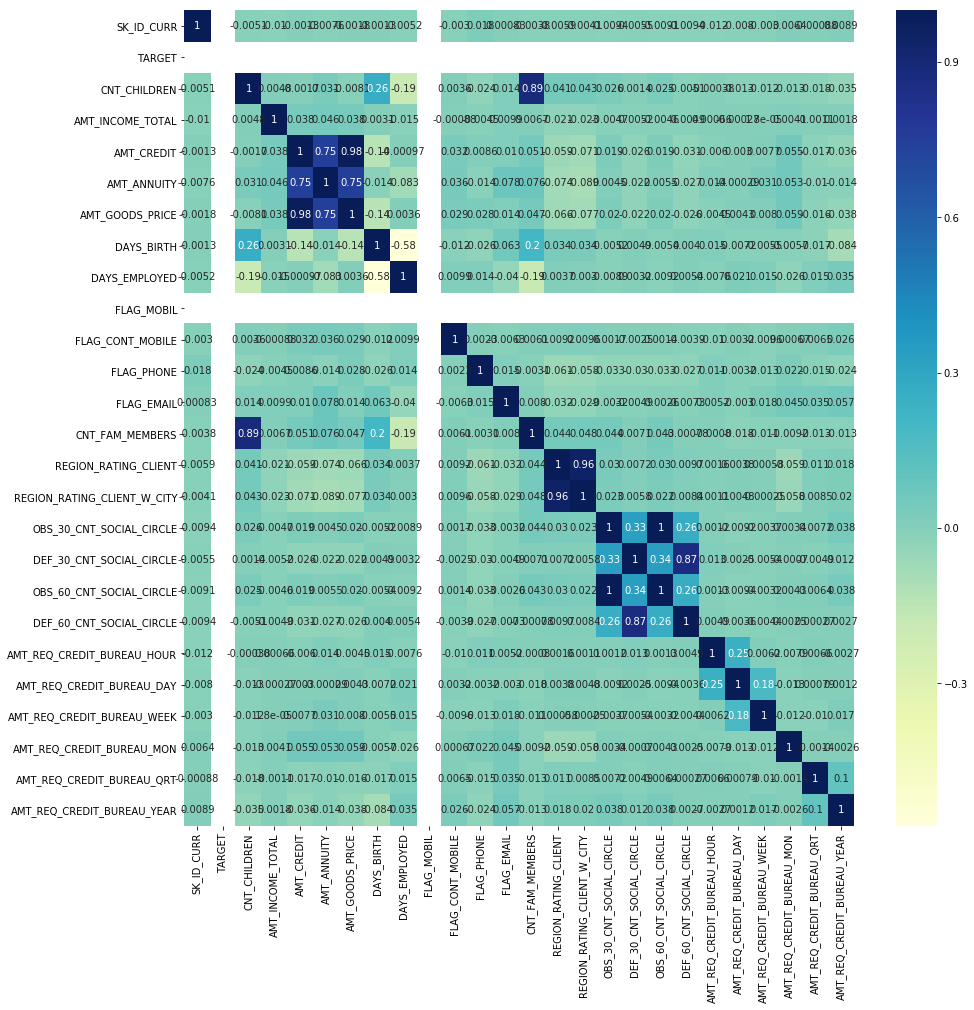

In [98]:
target_df=application[application['TARGET']==1]
target_df_num=target_df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(15,15))
sns.heatmap(target_df_num.corr(),annot=True,cmap='YlGnBu')

In [95]:
target_df_num.corr()

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                       1.0000     nan       -0.0051   
TARGET                              nan     nan           nan   
CNT_CHILDREN                    -0.0051     nan        1.0000   
AMT_INCOME_TOTAL                -0.0102     nan        0.0048   
AMT_CREDIT                      -0.0013     nan       -0.0017   
AMT_ANNUITY                     -0.0076     nan        0.0313   
AMT_GOODS_PRICE                 -0.0018     nan       -0.0081   
DAYS_BIRTH                      -0.0013     nan        0.2591   
DAYS_EMPLOYED                   -0.0052     nan       -0.1919   
FLAG_MOBIL                          nan     nan           nan   
FLAG_CONT_MOBILE                -0.0030     nan        0.0036   
FLAG_PHONE                       0.0182     nan       -0.0243   
FLAG_EMAIL                       0.0008     nan        0.0139   
CNT_FAM_MEMBERS                 -0.0038     nan        0.8855   
REGION_RATING_CLIENT            -0.0059     nan        0.0407   
REGION_RATING_CLIENT_W_CITY     -0.0041     nan        0.0432   
OBS_30_CNT_SOCIAL_CIRCLE        -0.0094     nan        0.0258   
DEF_30_CNT_SOCIAL_CIRCLE        -0.0055     nan        0.0014   
OBS_60_CNT_SOCIAL_CIRCLE        -0.0091     nan        0.0252   
DEF_60_CNT_SOCIAL_CIRCLE        -0.0094     nan       -0.0051   
AMT_REQ_CREDIT_BUREAU_HOUR      -0.0120     nan       -0.0004   
AMT_REQ_CREDIT_BUREAU_DAY       -0.0080     nan       -0.0130   
AMT_REQ_CREDIT_BUREAU_WEEK      -0.0030     nan       -0.0118   
AMT_REQ_CREDIT_BUREAU_MON        0.0064     nan       -0.0126   
AMT_REQ_CREDIT_BUREAU_QRT       -0.0009     nan       -0.0182   
AMT_REQ_CREDIT_BUREAU_YEAR       0.0089     nan       -0.0354   

                             AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                            -0.0102     -0.0013      -0.0076   
TARGET                                    nan         nan          nan   
CNT_CHILDREN                           0.0048     -0.0017       0.0313   
AMT_INCOME_TOTAL                       1.0000      0.0381       0.0464   
AMT_CREDIT                             0.0381      1.0000       0.7522   
AMT_ANNUITY                            0.0464      0.7522       1.0000   
AMT_GOODS_PRICE                        0.0376      0.9831       0.7527   
DAYS_BIRTH                             0.0031     -0.1353      -0.0143   
DAYS_EMPLOYED                         -0.0150     -0.0010      -0.0826   
FLAG_MOBIL                                nan         nan          nan   
FLAG_CONT_MOBILE                      -0.0009      0.0318       0.0357   
FLAG_PHONE                            -0.0045      0.0086      -0.0138   
FLAG_EMAIL                             0.0099      0.0102       0.0782   
CNT_FAM_MEMBERS                        0.0067      0.0512       0.0757   
REGION_RATING_CLIENT                  -0.0215     -0.0592      -0.0738   
REGION_RATING_CLIENT_W_CITY           -0.0228     -0.0714      -0.0893   
OBS_30_CNT_SOCIAL_CIRCLE              -0.0047      0.0191       0.0045   
DEF_30_CNT_SOCIAL_CIRCLE              -0.0052     -0.0260      -0.0224   
OBS_60_CNT_SOCIAL_CIRCLE              -0.0046      0.0195       0.0055   
DEF_60_CNT_SOCIAL_CIRCLE              -0.0049     -0.0309      -0.0275   
AMT_REQ_CREDIT_BUREAU_HOUR             0.0007     -0.0060       0.0140   
AMT_REQ_CREDIT_BUREAU_DAY             -0.0003      0.0030      -0.0003   
AMT_REQ_CREDIT_BUREAU_WEEK             0.0000      0.0077       0.0312   
AMT_REQ_CREDIT_BUREAU_MON              0.0041      0.0550       0.0534   
AMT_REQ_CREDIT_BUREAU_QRT             -0.0011     -0.0175      -0.0102   
AMT_REQ_CREDIT_BUREAU_YEAR             0.0018     -0.0357      -0.0138   

                             AMT_GOODS_PRICE  DAYS_BIRTH  DAYS_EMPLOYED  \
SK_ID_CURR                           -0.0018     -0.0013        -0.0052   
TARGET                                   nan         nan            nan   
CNT_CHILDREN                         -0.0081     

## "AMT_CREDIT" variable is highly correlated with the "AMT_GOODS_PRICE" This means higher the loan amount is for the goods that are highly priced.

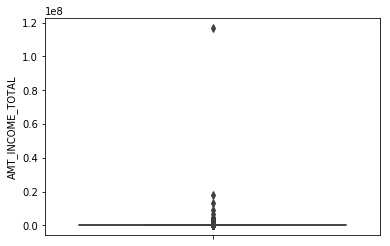

In [26]:
sns.boxplot(y=application['AMT_INCOME_TOTAL'])
plt.show()

# We can clearly outliers for AMT_INCOME_TOTAL attribute

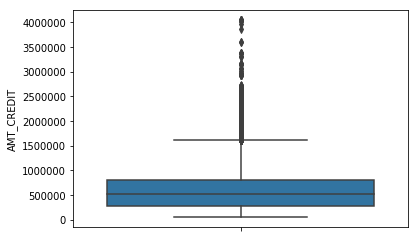

In [99]:
sns.boxplot(y=application['AMT_CREDIT'])
plt.show()

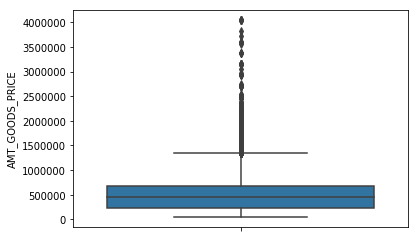

In [100]:
sns.boxplot(y=application['AMT_GOODS_PRICE'])
plt.show()

In [37]:
prev_loan=pd.read_csv('previous_application.csv')

In [38]:
prev_loan.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans    1730.4300       17145.0000   
1     2802425      108129         Cash loans   25188.6150      607500.0000   
2     2523466      122040         Cash loans   15060.7350      112500.0000   
3     2819243      176158         Cash loans   47041.3350      450000.0000   
4     1784265      202054         Cash loans   31924.3950      337500.0000   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0  17145.0000            0.0000       17145.0000                   SATURDAY   
1 679671.0000               nan      607500.0000                   THURSDAY   
2 136444.5000               nan      112500.0000                    TUESDAY   
3 470790.0000               nan      450000.0000                     MONDAY   
4 404055.0000               nan      337500.0000                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1             0.0000                 0.1828   
1                       1                nan                    nan   
2                       1                nan                    nan   
3                       1                nan                    nan   
4                       1                nan                    nan   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                    0.8673                    XAP             Approved   
1                       nan                    XNA             Approved   
2                       nan                    XNA             Approved   
3                       nan                    XNA             Approved   
4                       nan                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0      12.0000           middle  POS mobile with interest         365243.0000   
1      36.0000       low_action          Cash X-Sell: low         365243.0000   
2      12.0000             high         Cash X-Sell: high         365243.0000   
3      12.0000           middle       Cash X-Sell: middle         365243.0000   
4      24.0000             high         Cash Street: high                 nan   

   D

In [39]:
prev_loan.shape

(1670214, 37)

List of Columns & NA counts where NA values are more than 30%

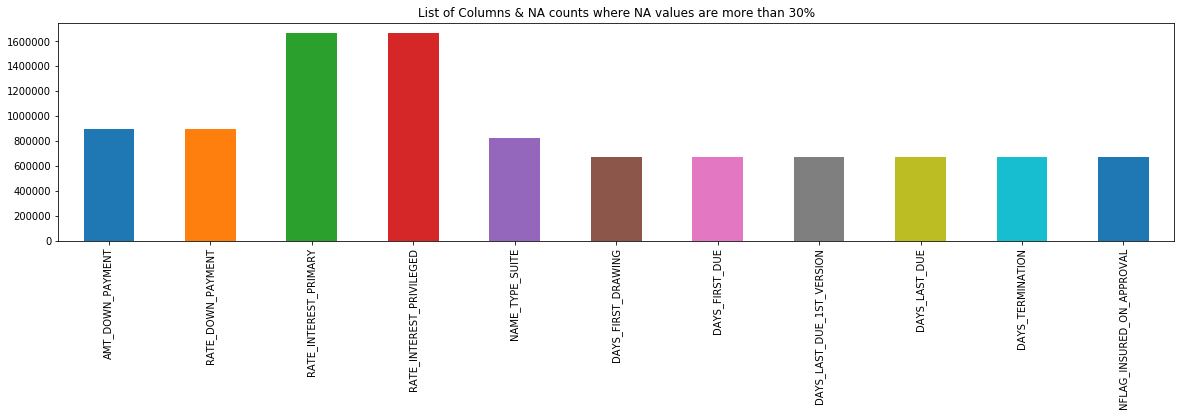

In [40]:
NA_col = prev_loan.isnull().sum()
NA_col = NA_col[NA_col.values >(0.3*len(prev_loan))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 30%')
plt.show()

Insights: So we can see from the above plot that there are 10+ columns in the dataset where all the values are NA.

As we can see there are 1670214 rows & 37 columns in the dataset, it will be very difficult to look at each column one by one & find the NA or missing values. So let's find out all columns where missing values are more than certain percentage, let's say 30%. We will remove those columns as it is not feasable to impute missing values for those columns.

1. Remove columns where NA values are more than or equal to 30%¶

In [41]:
prev_loan = removeNulls(prev_loan, axis =1,percent = 0.3)

Number of Columns dropped	:  11

Old dataset rows,columns (1670214, 37) 
New dataset rows,columns (1670214, 26)


2. Remove rows where NA values are more than or equal to 30%

(Note: NA columns has already been removed in step 1, so we may not find any rows where 30% values are NA)


In [42]:
prev_loan = removeNulls(prev_loan, axis =0,percent = 0.3)


Number of Rows dropped	:  0

Old dataset rows,columns (1670214, 26) 
New dataset rows,columns (1670214, 26)


3. Remove columns where number of unique value is only 1.

Let's look at no of unique values for each column.We will remove all columns where number of unique value is only 1 because that will not make any sense in the analysis


In [43]:
unique = prev_loan.nunique()
unique = unique[unique.values == 1]

In [44]:
prev_loan.drop(labels = list(unique.index), axis =1, inplace=True)
print("So now we are left with",prev_loan.shape ,"rows & columns.")

So now we are left with (1670214, 26) rows & columns.


In [45]:
prev_loan.head(2)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans    1730.4300       17145.0000   
1     2802425      108129         Cash loans   25188.6150      607500.0000   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0  17145.0000       17145.0000                   SATURDAY   
1 679671.0000      607500.0000                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE    CHANNEL_TYPE  \
0              Mobile            POS               XNA    Country-wide   
1                 XNA           Cash            x-sell  Contact center   

   SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
0                35         Connectivity      12.0000           middle   
1                -1                  XNA      36.0000       low_action   

        PRODUCT_COMBINATION  
0  POS mobile with interest  
1          Cash X-Sell: low

In [ ]:
result.head()

In [ ]:
result.isnull().sum()

In [ ]:
result = removeNulls(df3, axis =1,percent = 0.3)

In [ ]:
result.columns

In [ ]:
result.shape

In [ ]:
result.info()